# Simpson's Paradox:
- def: when the relationship between two variables reverses itself when controlling for a third variable
- visualize variable interaction
- be caseful about assumptions

# Exercise

Use the code in this notebook to complete the following exercises:
1. For df1:
    - Take a look at the data in df1.
    - Does x increase from time one to time two?
    - Visualize the relationship between x and time.
    - Run a statistical test to further examine the relationship between these features.

2. For df2:
    - Take a look at the data in df2.
    - Visualize the relationship between x and y.
    - How would you describe the relationship between x and y?
    - Run a statistical test to examine the relationship between x and y.

3. For df3:
    - Take a look at the data in df3
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
#acquire DFs
df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

<hr style="border:2px solid black"> </hr>

### #1. DF1

#### A. Take a look at the data in df1.

In [3]:
#look at the data
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [4]:
#take a look at the shape
df1.shape

(200, 3)

In [5]:
#check dtypes, nulls, etc
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   200 non-null    object 
 1   x       200 non-null    float64
 2   time    200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [6]:
#be sure there are no nulls
df1.isnull().sum()

group    0
x        0
time     0
dtype: int64

#### B. Does x increase from time one to time two?

In [7]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [8]:
df1.pivot_table('x','group','time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


#### C. Visualize the relationship between x and time.

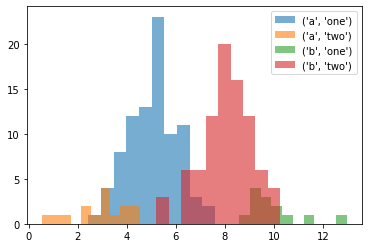

In [11]:
for subgroup, x in df1.groupby(['group', 'time']).x:
    plt.hist(x, label=str(subgroup), alpha=.6)
plt.legend()

#### D. Run a statistical test to further examine the relationship between these features.

<hr style="border:2px solid black"> </hr>

### For df2

#### A. Take a look at the data in df2.

In [12]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
 2   group   200 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [14]:
df2.describe()

,x,y
count,200.000000,200.000000
mean,99.980573,606.099784
std,7.753863,26.958585
min,84.542520,542.096437
25%,93.056095,586.579382
50%,100.095115,599.022923
75%,107.320842,629.098231
max,114.606179,665.250458


#### B. Visualize the relationship between x and y.

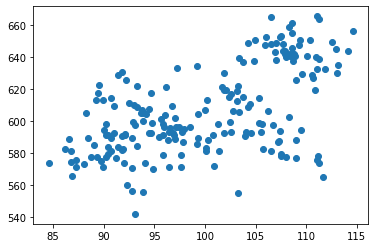

In [15]:
plt.scatter(df2.x, df2.y)

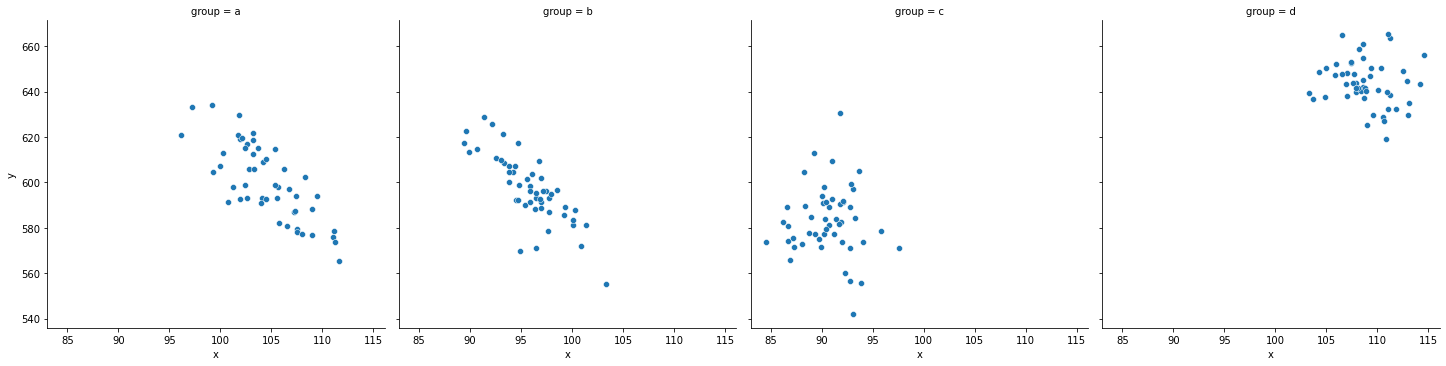

In [18]:
sns.relplot(data=df2, y='y', x='x', col ='group')

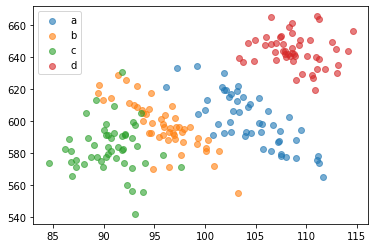

In [22]:
for group, subset in df2.groupby('group'):
    plt.scatter(subset.x, subset.y, label=group, alpha=.6)
plt.legend()

#### C. How would you describe the relationship between x and y?

In [ ]:
# individually, by group, the correlation is negative

#### D. Run a statistical test to examine the relationship between x and y.

<hr style="border:2px solid black"> </hr>

### For df3:

#### A. Take a look at the data in df3

In [26]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


In [27]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   surgeon  1000 non-null   object
 1   surgery  1000 non-null   object
 2   success  1000 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


#### B. Which surgeon has the higher success rate?

In [23]:
df3.groupby('surgeon').success.mean()
#surgeon A has a MUCH higher OVERALL success rate

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

In [24]:
pd.crosstab(df3.surgeon, df3.surgery)

surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418


#### C. If you had to have heart bypass surgery, which surgeon would you go to?

In [25]:
df3.query('surgery == "heart bypass"').groupby('surgeon').success.mean()
#youd go to surgeon B

surgeon
A    0.656566
B    0.672249
Name: success, dtype: float64

<hr style="border:2px solid black"> </hr>